## Linear Regression

This is a test to try out the linear regression module from the SciKit Learn package in Python. The goal is create a model that can be used to optimise a batch production process that has various procesing parameters and process outputs.

## Libraries

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as mod

## Data

For this exercise we will simulate some production parameters, inputs, outputs etc. Then we will put them into a pandas dataframe. 

Inputs to the malting process will be:
1. malt_type
1. variety
1. bar_moi
1. bar_TN
1. steep_temp
1. steep_time
1. germ_temp
1. germ_time
1. kiln_temp
1. kiln_hum
1. amb_temp
1. amb_hum

Outputs will be:
1. gas_usage
1. elec_usage
1. ftr

We will simulate 100 data points of each

In [52]:
# Simulate inputs
malt_type = [np.random.choice(['Stout', 'Lager', 'Bushmills', 'Heineken', 'IDL', 'Grants', 'Waterford'], p=(0.6, 0.05, 0.1, 0.05, 0.1, 0.05, 0.05)) for i in range(500)]
variety = [np.random.choice(['Propino', 'Planet', 'Olympus']) for i in range(500)]
bar_moi = [np.random.normal(13.5, 0.3) for i in range(500)]
bar_TN = [np.random.normal(1.65, 0.05) for i in range(500)]
steep_temp = [np.random.normal(18, 2) for i in range(500)]
steep_time = [np.random.normal(35, 1) for i in range(500)]
germ_temp = [np.random.normal(20, 2) for i in range(500)]
germ_time = [np.random.normal(87, 3) for i in range(500)]
kiln_temp = [np.random.normal(78, 1) for i in range(500)]
kiln_hum = [np.random.normal(4.2, 0.1) for i in range(500)]
amb_temp = [np.random.normal(15, 4) for i in range(500)]
amb_hum = [np.random.normal(67, 5) for i in range(500)]

# Simulate outputs
gas_usage = [np.random.normal(600, 30) for i in range(500)]
elec_usage = [np.random.normal(90, 2) for i in range(500)]
ftr = [np.random.choice([100, 75, 50, 25, 0], p=(0.5, 0.3, 0.1, 0.05, 0.05)) for i in range(500)]

# Create a data frame
malt = pd.DataFrame({"malt_type": malt_type, "variety": variety ,"bar_moi": bar_moi, "bar_TN": bar_TN, "steep_temp": steep_temp,"steep_time": steep_time, "germ_temp": germ_temp, "germ_time": germ_time, "kiln_temp": kiln_temp, "kiln_hum": kiln_hum, "amb_temp": amb_temp, "amb_hum": amb_hum, "gas_usage": gas_usage, "elec_usage": elec_usage, "ftr": ftr})

In [53]:
malt.head()

,malt_type,variety,bar_moi,bar_TN,steep_temp,steep_time,germ_temp,germ_time,kiln_temp,kiln_hum,amb_temp,amb_hum,gas_usage,elec_usage,ftr
0,Stout,Planet,13.468848,1.637456,22.899145,34.733170,18.907019,89.347040,75.998021,4.177372,12.266440,73.834522,564.669362,87.031940,100
1,Waterford,Propino,13.441098,1.662845,19.515228,35.435355,15.644133,82.994983,78.757661,4.293587,12.039648,53.908675,602.939365,91.875365,100
2,Stout,Propino,13.200513,1.687260,17.679356,34.944812,20.400258,86.932772,77.245624,4.054888,11.320911,66.951462,636.260549,90.936575,25
3,IDL,Propino,13.549105,1.675778,16.362084,34.918284,21.816152,86.093551,77.605478,4.292740,16.764241,65.438550,601.791814,90.506246,50
4,Stout,Propino,13.415508,1.580569,18.190485,36.433396,18.816468,82.901539,76.808247,4.272341,12.712081,67.617671,605.216044,91.819365,100


## Visualise

/Users/patrickmoore/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


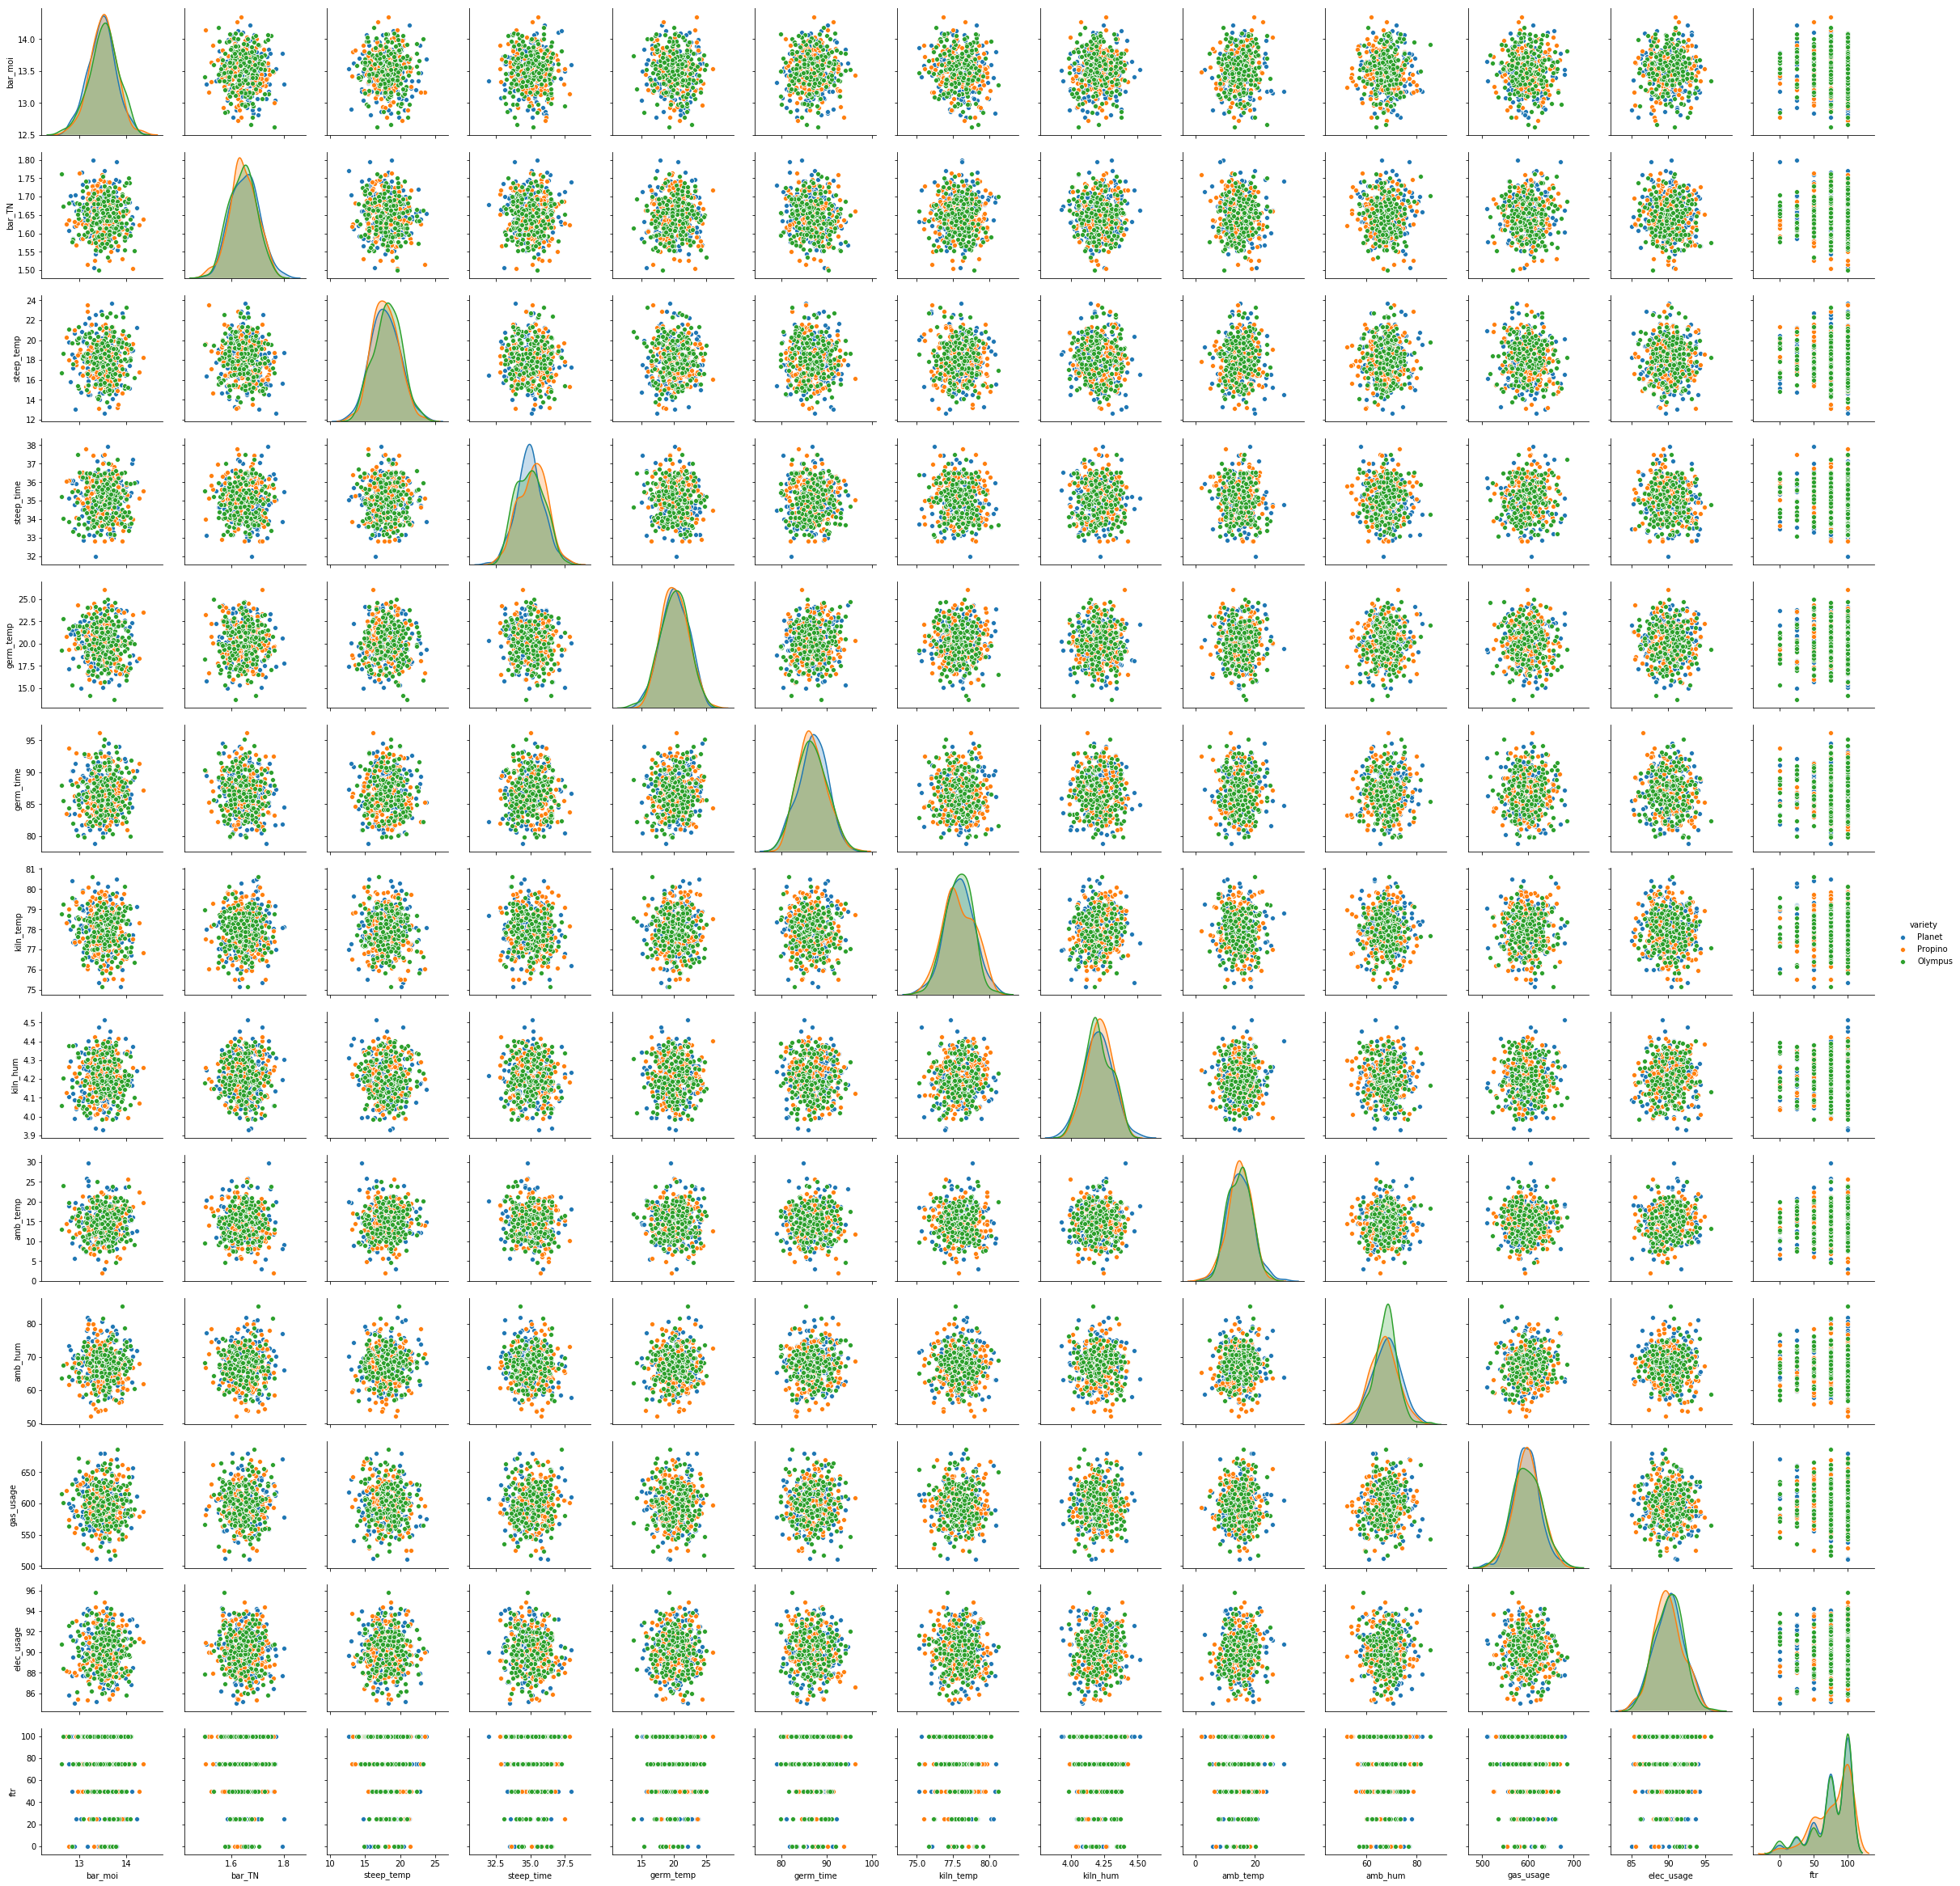

In [54]:
# Plot the Iris data set with a pair plot.
sns.pairplot(malt, hue="variety")

## Define inputs and outputs for the model

In [48]:
inputs = malt[['bar_moi', 'bar_TN', 'steep_temp', 'steep_time', 'germ_temp', 'germ_time', 'kiln_temp', 'kiln_hum', 'amb_temp', 'amb_hum']]
outputs = malt[['gas_usage', 'elec_usage', 'ftr' ]]

## Regressor and Fit

In [49]:
reg = LinearRegression().fit(inputs, outputs)

## Predict

In [50]:
reg.predict(malt[['bar_moi', 'bar_TN', 'steep_temp', 'steep_time', 'germ_temp', 'germ_time', 'kiln_temp', 'kiln_hum', 'amb_temp', 'amb_hum']][200:205])

array([[598.15552079,  89.79144639,  76.24062063],
       [590.18767955,  89.98866875,  74.98207668],
       [592.16775465,  89.72804546,  74.96173894],
       [593.63616263,  89.88571817,  76.90618409],
       [603.8350516 ,  89.74869876,  78.64955594]])

## Evaluate

In [67]:
# create a train test split
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

# refit using the training inputs and outputs
reg = LinearRegression().fit(inputs_train, outputs_train)

# predict
(reg.predict(inputs_test) - outputs_test).mean()


gas_usage     2.616713
elec_usage    0.503793
ftr          -3.200558
dtype: float64

On average this model will get us within 2 KWH of gas, 0.5 kWH of elec, and 3% ftr

## End